# 🚢 Titanic Data - Exploratory Data Analysis (EDA)

This project performs a detailed exploratory data analysis (EDA) on the Titanic dataset.  
We aim to uncover patterns and insights related to passenger survival using Python libraries like Pandas, Matplotlib, and Seaborn.

**Dataset Used:** train.csv from Kaggle Titanic Competition


Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="darkgrid")


## 🗂️ Load & Inspect the Dataset

We begin by loading the `train.csv` file and taking a look at its structure.

In [21]:
# Load Titanic training dataset
df = pd.read_csv(r'D:\Python Projects\titanic\train.csv')

# Display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 📊 Dataset Summary

Let’s explore the structure, data types, and missing values in the dataset.


In [23]:
# Check the shape and column types
df.info()

# Basic statistics for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## ❗ Missing Data Analysis

Let’s check how many missing values exist in each column.


In [25]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 🧹 Data Cleaning

Based on the missing value analysis:
- We will fill missing `Age` values with the **median age**
- Fill missing `Embarked` values with the **mode** ('S')
- Drop the `Cabin` column due to excessive missing data


In [27]:
# Fill missing Age values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column
df.drop(columns=['Cabin'], inplace=True)

# Verify that all missing values are now handled
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 🔍 Univariate Analysis

Let’s analyze individual features to understand their distribution and frequency.


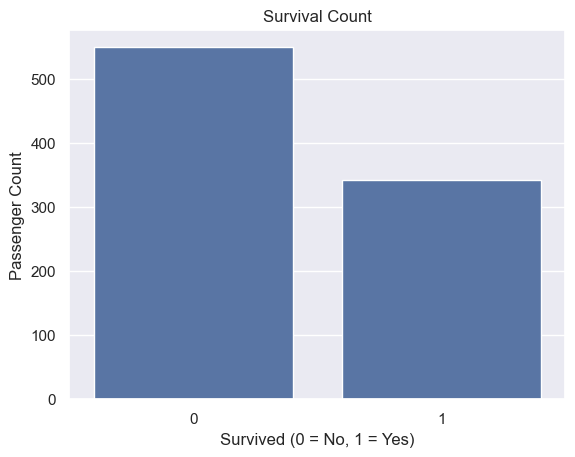

In [29]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")
plt.show()


 Gender Distribution

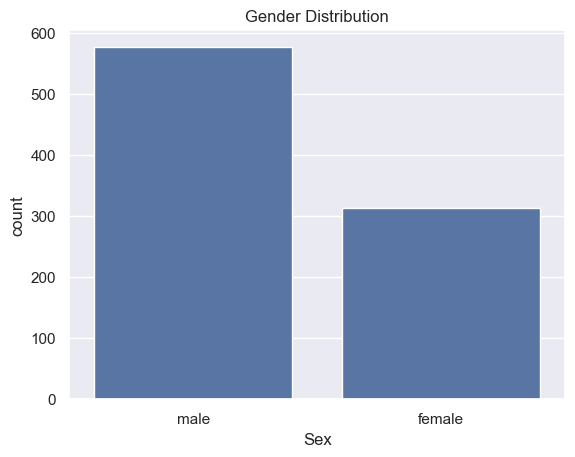

In [31]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()


Passenger Class Distribution

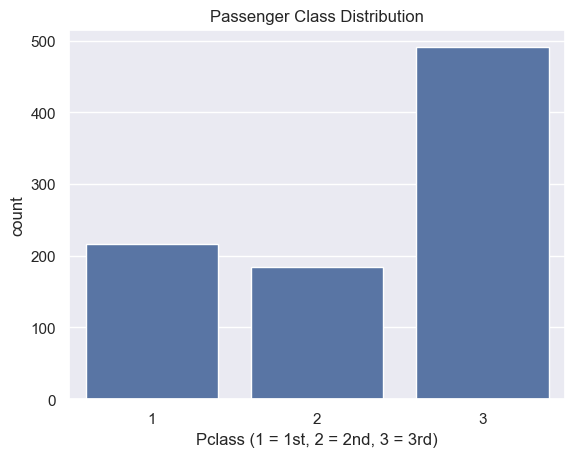

In [33]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.xlabel("Pclass (1 = 1st, 2 = 2nd, 3 = 3rd)")
plt.show()


## 🔗 Bivariate Analysis

We now explore how different features correlate with survival.


Survival by Gender

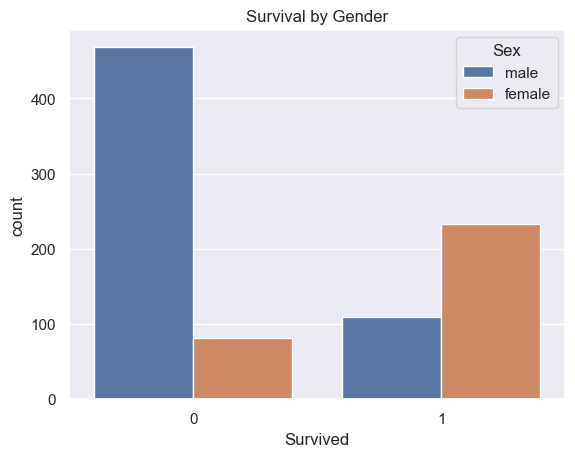

In [35]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()


Survival by Passenger Class

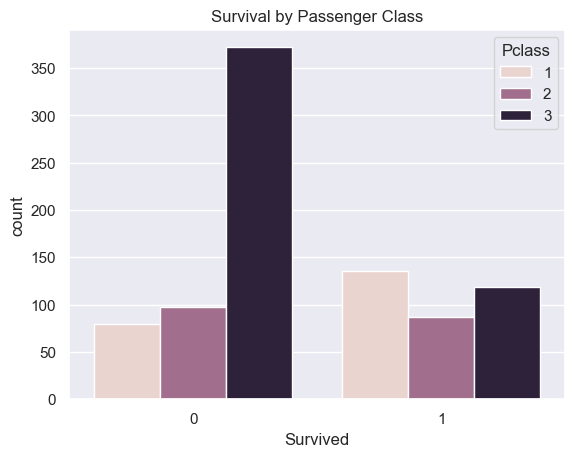

In [37]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()


Age Distribution

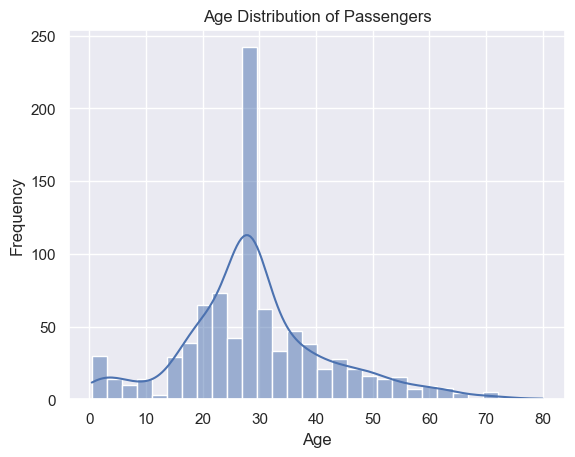

In [39]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


Age vs Survival (Boxplot)

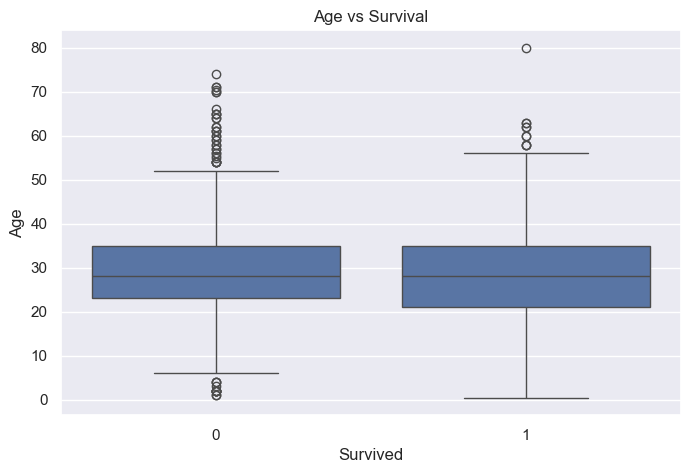

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()


## ✅ Conclusion

From this exploratory data analysis, we observe the following:

- **Females** had a much higher survival rate than males.
- **First-class passengers** had better survival chances than second and third class.
- **Younger passengers**, particularly children, had relatively better chances of survival.
- `Sex`, `Pclass`, and `Age` are important features related to survival.

This dataset gives us clear direction on which features could be useful in future predictive modeling.
